1 trees
Time elapsed: 0:00:03.417259
Score: 0.5969238921229825
10 trees
Time elapsed: 0:00:31.190629
Score: 0.6638609464607079
20 trees
Time elapsed: 0:01:02.390965
Score: 0.6814986706295388
30 trees
Time elapsed: 0:01:33.184338
Score: 0.6895748808207075


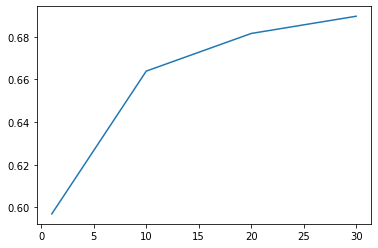

Max roc_auc score: 0.6895748808207075 N= 30


In [3]:
import pandas
import time
import datetime
import matplotlib.pyplot as plt
import sklearn.metrics as mtr
import sklearn.model_selection as ms
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

data_train = pandas.read_csv('features.csv', index_col = 'match_id')
target_train = data_train['radiant_win']

#признаки отсутствуют в тестовой выборке
data_train.drop(['duration', 'radiant_win', 'tower_status_radiant', 
'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire'], inplace = True, axis = 1)

#первая кровь, постановка вардов, покупка и апгрейд куры могут произойти после 5 минуты, отсюда пропуски
#data.count()

#заменяем пропуски на 0
data_train.fillna(value = 0, inplace = True)

#целевая переменная - radiant_win, так как мы предсказываем победу radiant

kf = ms.KFold(n_splits = 5, shuffle = True)
#N_list = [1, 10, 20, 30, 40, 60, 100, 200, 400]
N_list = [1, 10, 20, 30]
score_list = []

for N_trees in N_list:
    clf = GradientBoostingClassifier(n_estimators = N_trees)
    print( N_trees, 'trees')
    start_time = datetime.datetime.now()
    
    predictions = ms.cross_val_predict(estimator = clf, X = data_train, y = target_train, cv = kf, method = 'predict_proba')[:, 1]
    score = mtr.roc_auc_score(target_train, predictions)
    print( 'Time elapsed:', datetime.datetime.now() - start_time)
    print ('Score:', score)
    score_list.append(score)
plt.figure()
plt.plot(N_list, score_list)
plt.show()

print ('Max roc_auc score:', max(score_list), 'N=', N_list[score_list.index(max(score_list))])

In [4]:
import pandas
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import sklearn.metrics as mtr
import sklearn.model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
%matplotlib inline

data_train = pandas.read_csv('features.csv', index_col = 'match_id')
target_train = data_train['radiant_win']
N_heroes = max(pandas.concat([data_train['r1_hero'], data_train['r2_hero'], data_train['r3_hero'], data_train['r4_hero'], data_train['r5_hero'],data_train['d1_hero'], data_train['d2_hero'], data_train['d3_hero'], data_train['d4_hero'], data_train['d5_hero']], ignore_index = True).unique())
print ('N_heroes =', N_heroes)
# N_heroes — количество различных героев в выборке
X_pick = np.zeros((data_train.shape[0], N_heroes))

for i, match_id in enumerate(data_train.index):
    for p in range(5):
        X_pick[i, data_train.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, data_train.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
#признаки отсутствуют в тестовой выборке
data_train.drop(['duration', 'radiant_win', 'tower_status_radiant', 
'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire'], inplace = True, axis = 1)
data_train.drop(['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero',
'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero'], inplace = True, axis = 1)

#первая кровь, постановка вардов, покупка и апгрейд куры могут произойти после 5 минуты, отсюда пропуски
#data.count()

#заменяем пропуски на 0
data_train.fillna(value = 0, inplace = True)

#целевая переменная - radiant_win, так как мы предсказываем победу radiant
data_train = np.hstack([data_train, X_pick])
scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)

kf = ms.KFold(n_splits = 5, shuffle = True)
C_list = range(-6, 8)
score_list = []

for i in C_list:
    C = 10.0 ** i
    clf = LogisticRegression(C = C, max_iter = 10000)
    print ('C =', C)
    start_time = datetime.datetime.now()

    predictions = ms.cross_val_predict(estimator = clf, X = data_train, y = target_train, cv = kf, method = 'predict_proba')[:, 1]
    score = mtr.roc_auc_score(target_train, predictions)
    print ('Time elapsed:', datetime.datetime.now() - start_time)
    print ('Score:', score)
    score_list.append(score)
plt.figure()
plt.plot(C_list, score_list)
plt.show()

print ('Max roc_auc score:', max(score_list), 'C=', 10.0 ** C_list[score_list.index(max(score_list))])

N_heroes = 112


AttributeError: 'DataFrame' object has no attribute 'ix'

In [ ]:
import pandas
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import sklearn.metrics as mtr
import sklearn.model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
%matplotlib inline

data_train = pandas.read_csv('features.csv', index_col = 'match_id')
data_test = pandas.read_csv('features_test.csv', index_col = 'match_id')
target_train = data_train['radiant_win']
N_heroes = max(pandas.concat([data_train['r1_hero'], data_train['r2_hero'], data_train['r3_hero'], data_train['r4_hero'], data_train['r5_hero'],data_train['d1_hero'], data_train['d2_hero'], data_train['d3_hero'], data_train['d4_hero'], data_train['d5_hero']], ignore_index = True).unique())
print( 'N_heroes =', N_heroes)
# N_heroes — количество различных героев в выборке
X_pick = np.zeros((data_train.shape[0], N_heroes))

for i, match_id in enumerate(data_train.index):
    for p in range(5):
        X_pick[i, data_train.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, data_train.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

X_pick_test = np.zeros((data_test.shape[0], N_heroes))

for i, match_id in enumerate(data_test.index):
    for p in range(5):
        X_pick_test[i, data_test.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick_test[i, data_test.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
#признаки отсутствуют в тестовой выборке
data_train.drop(['duration', 'radiant_win', 'tower_status_radiant', 
'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire'], inplace = True, axis = 1)
data_train.drop(['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero',
'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero'], inplace = True, axis = 1)
data_test.drop(['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero',
'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero'], inplace = True, axis = 1)
#первая кровь, постановка вардов, покупка и апгрейд куры могут произойти после 5 минуты, отсюда пропуски
#data.count()

#заменяем пропуски на 0
data_train.fillna(value = 0, inplace = True)
data_test.fillna(value = 0, inplace = True)

#целевая переменная - radiant_win, так как мы предсказываем победу radiant
data_train = np.hstack([data_train, X_pick])
data_test = np.hstack([data_test, X_pick_test])
scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

#C = 10000, roc_auc_score = 0.75 
clf = LogisticRegression(C = 10000, max_iter = 10000)
clf.fit(data_train, target_train)
predictions = clf.predict_proba(data_test)[:, 1]
plt.figure()
plt.plot(predictions)
plt.show()
print( max(predictions), min(predictions))